In [1]:
import pandas as pd
import numpy as np

I changed it to drop na before combining, so that can use the size of those dataframes to return the test and trian with the original separation

In [2]:
# read in data
adult_train = pd.read_csv("adult.data", header=None)
adult_test = pd.read_csv("adult.test", header=None, skiprows=1)
adult_train = adult_train.replace({' ?': np.nan}).dropna()
adult_test = adult_test.replace({' ?': np.nan}).dropna()

adult = pd.concat([adult_train, adult_test], axis = 0)
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationnNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
adult.head()

,age,workclass,fnlwgt,education,educationnNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult.head()

,age,workclass,fnlwgt,education,educationnNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# adult_list = adult.values.tolist()
# adult_list[0]

I would use the terms 'group' and 'label' so if we want to do everything with another dataset later, wording isn't specific to this dataset

In [5]:
adult['group'] =adult["sex"].replace({" Male": 0, " Female": 1})
adult['label'] = adult["income"].replace({" <=50K.": -1, " >50K.": 1, " <=50K":-1, " >50K": 1})

adult.drop(['sex', 'label'], axis=1)

,age,workclass,fnlwgt,education,educationnNum,maritalStatus,occupation,relationship,race,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,0,0,40,United-States,<=50K.,0
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,36,United-States,<=50K.,1
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,50,United-States,<=50K.,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,5455,0,40,United-States,<=50K.,0


In [6]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# df = adult.select_dtypes(include=[object])
# enc.fit(df)
# out = pd.DataFrame(enc.transform(df).toarray())
# out.head()


In [7]:
y = pd.get_dummies(adult.workclass, prefix='workclass')
y.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [8]:
adult = adult.drop(columns=['workclass'])
adult = pd.concat([adult, y], axis=1)
adult.head()

,age,fnlwgt,education,educationnNum,maritalStatus,occupation,relationship,race,sex,capitalGain,...,income,group,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,<=50K,0,-1,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,<=50K,0,-1,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,<=50K,0,-1,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,<=50K,0,-1,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,<=50K,1,-1,0,0,1,0,0,0,0


In [9]:
y = pd.get_dummies(adult.education, prefix='education')
adult = adult.drop(columns=['education'])
adult = pd.concat([adult, y], axis=1)


In [10]:
y = pd.get_dummies(adult.maritalStatus, prefix='maritalStatus')
adult = adult.drop(columns=['maritalStatus'])
adult = pd.concat([adult, y], axis=1)

In [11]:
y = pd.get_dummies(adult.occupation, prefix='occupation')
adult = adult.drop(columns=['occupation'])
adult = pd.concat([adult, y], axis=1)

In [12]:
y = pd.get_dummies(adult.relationship, prefix='relationship')
adult = adult.drop(columns=['relationship'])
adult = pd.concat([adult, y], axis=1)

In [13]:
y = pd.get_dummies(adult.race, prefix='race')
adult = adult.drop(columns=['race'])
adult = pd.concat([adult, y], axis=1)

In [14]:
y = pd.get_dummies(adult.nativeCountry, prefix='nativeCountry')
adult = adult.drop(columns=['nativeCountry'])
adult = pd.concat([adult, y], axis=1)

In [15]:
adult.columns

Index(['age', 'fnlwgt', 'educationnNum', 'sex', 'capitalGain', 'capitalLoss',
       'hoursPerWeek', 'income', 'group', 'label',
       ...
       'nativeCountry_ Portugal', 'nativeCountry_ Puerto-Rico',
       'nativeCountry_ Scotland', 'nativeCountry_ South',
       'nativeCountry_ Taiwan', 'nativeCountry_ Thailand',
       'nativeCountry_ Trinadad&Tobago', 'nativeCountry_ United-States',
       'nativeCountry_ Vietnam', 'nativeCountry_ Yugoslavia'],
      dtype='object', length=106)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
adult[["age"]] = scaler.fit_transform(adult[["age"]])

In [19]:
adult[["fnlwgt"]] = scaler.fit_transform(adult[["fnlwgt"]])
adult[["educationnNum"]] = scaler.fit_transform(adult[["educationnNum"]])
adult[["capitalGain"]] = scaler.fit_transform(adult[["capitalGain"]])
adult[["capitalLoss"]] = scaler.fit_transform(adult[["capitalLoss"]])
adult[["hoursPerWeek"]] = scaler.fit_transform(adult[["hoursPerWeek"]])

In [20]:
adult.head()

,age,fnlwgt,educationnNum,sex,capitalGain,capitalLoss,hoursPerWeek,income,group,label,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,0.301370,0.043350,0.800000,Male,0.02174,0.0,0.397959,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.047274,0.800000,Male,0.00000,0.0,0.122449,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.136877,0.533333,Male,0.00000,0.0,0.397959,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.149792,0.400000,Male,0.00000,0.0,0.397959,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.219998,0.800000,Female,0.00000,0.0,0.397959,<=50K,1,-1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
adult_test_clean = adult.iloc[adult_train.shape[0]:,:]
adult_train_clean = adult.iloc[:adult_train.shape[0],:]

In [22]:
adult_test_clean.shape

(15060, 106)

In [23]:
adult_test.shape

(15060, 15)

In [24]:
adult_train_clean.shape

(30162, 106)

In [25]:
adult_train_clean.head()

,age,fnlwgt,educationnNum,sex,capitalGain,capitalLoss,hoursPerWeek,income,group,label,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,0.301370,0.043350,0.800000,Male,0.02174,0.0,0.397959,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.047274,0.800000,Male,0.00000,0.0,0.122449,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.136877,0.533333,Male,0.00000,0.0,0.397959,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.149792,0.400000,Male,0.00000,0.0,0.397959,<=50K,0,-1,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.219998,0.800000,Female,0.00000,0.0,0.397959,<=50K,1,-1,...,0,0,0,0,0,0,0,0,0,0


# Abernethy algorithm

In [26]:
from algorithm import *
from metric import *

In [27]:
# clf = Adaptive_clf_Abernethy()

In [28]:
label = list(adult_train_clean.label)
group = list(adult_train_clean.group)
train = adult_train_clean.drop(columns=['income', 'sex', 'group', 'label'])
train = train.values.tolist()

In [29]:
import pandas as pd

In [30]:
fairness_violation = pd.DataFrame()
# fairness_violation.columns = ["p", "checkpoint", "demographic parity", "equal odds",  "equal opportunity", "overall accuracy"]
train_loss = []
for p in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    for i in range(10):
        clf = Adaptive_clf_Abernethy()
        clf.make_set(train, label, group, 48, 300)
        fairness, loss = clf.train(Equal_opportunity_worst_group, loss_01, p=p, T=1000)
        fairness_violation = pd.concat([fairness_violation, pd.DataFrame(fairness)], axis=0)
        train_loss.append(loss)

In [31]:
fairness_violation.columns = ["p", "checkpoint", "train_error","demographic parity", "equal odds", "equal_opportunity", "overall accuracy"]
fairness_violation

,p,checkpoint,train_error,demographic parity,equal odds,equal_opportunity,overall accuracy
0,0.0,500,0.250000,0.020000,0.040000,0.026667,0.046667
1,0.0,1000,0.256667,0.073333,0.146667,0.093333,0.020000
0,0.0,500,0.280000,0.093333,0.186667,0.093333,0.000000
1,0.0,1000,0.246667,0.106667,0.213333,0.133333,0.026667
0,0.0,500,0.300000,0.120000,0.240000,0.146667,0.026667
...,...,...,...,...,...,...,...
1,1.0,1000,0.313333,0.120000,0.240000,0.186667,0.066667
0,1.0,500,0.286667,0.213333,0.426667,0.320000,0.106667
1,1.0,1000,0.283333,0.193333,0.386667,0.306667,0.113333
0,1.0,500,0.340000,0.306667,0.613333,0.440000,0.133333


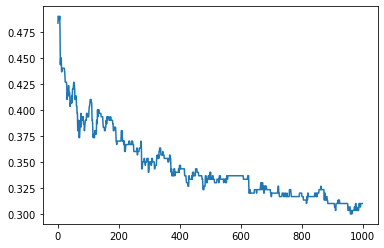

In [32]:
clf.display()

In [33]:
fairness_violation.to_csv("fairness_violation_Abernethy.csv")

# Shekhar Algorithm

In [34]:
# clf = Adaptive_clf_Shekhar()

In [35]:
# clf.make_set(train, label, group)

In [37]:
fairness_violation = pd.DataFrame()
train_loss = []
for c in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    for i in range(10):
        clf = Adaptive_clf_Shekhar()
        clf.make_set(train, label, group)
        fairness, loss = clf.train(2000, loss_01, C=c)
        fairness_violation = pd.concat([fairness_violation, pd.DataFrame(fairness)], axis=0)
        train_loss.append(loss)

In [38]:
df = pd.DataFrame(fairness_violation)
df.columns = ["C", "checkpoint", "train error", "demographic parity", "equal odds", "equal_opportunity", "overall accuracy"]

In [39]:
df

,C,checkpoint,train error,demographic parity,equal odds,equal_opportunity,overall accuracy
0,0.1,500,0.125000,0.083333,0.006450,0.015152,0.091270
1,0.1,1000,0.128486,0.145418,0.152786,0.104990,0.105578
0,0.1,500,0.132937,0.154762,0.158404,0.090643,0.091270
1,0.1,1000,0.137450,0.127490,0.036523,0.012987,0.103586
0,0.1,500,0.128968,0.166667,0.283112,0.233333,0.075397
...,...,...,...,...,...,...,...
1,1.0,1000,0.132470,0.189243,0.317183,0.245375,0.093625
0,1.0,500,0.109127,0.178571,0.241760,0.187013,0.059524
1,1.0,1000,0.133466,0.181275,0.163409,0.082931,0.103586
0,1.0,500,0.123016,0.202381,0.306492,0.233618,0.095238


In [40]:
df.to_csv("fairness_violation_Shekhar.csv")